# Calculate the short-term energy, zero-crossing rate, and MFCCs(Including all steps to calculate MFCC : Theoretical explanation) of a speech signal.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import stft, hamming
from python_speech_features import mfcc

In [2]:
# Load the speech signal
sample_rate, signal = wavfile.read('abc.wav')



In [3]:
# Set the parameters
frame_length = int(25 * sample_rate / 1000)  # Frame length in samples
frame_step = int(10 * sample_rate / 1000)  # Frame step in samples
nfft = 512  # FFT size
num_ceps = 12  # Number of MFCC coefficients to compute


In [4]:

# Calculate the short-term energy and zero-crossing rate
frames = np.array([signal[i:i+frame_length] for i in range(0, len(signal)-frame_length, frame_step)])
energy = np.sum(frames**2, axis=1)
zc_rate = np.sum(np.abs(np.diff(np.sign(frames))), axis=1) / (2 * frame_length)



In [5]:
# Calculate the MFCCs
mfccs = mfcc(signal, sample_rate, winlen=0.025, winstep=0.01, numcep=num_ceps, nfilt=26, nfft=nfft, preemph=0.97)



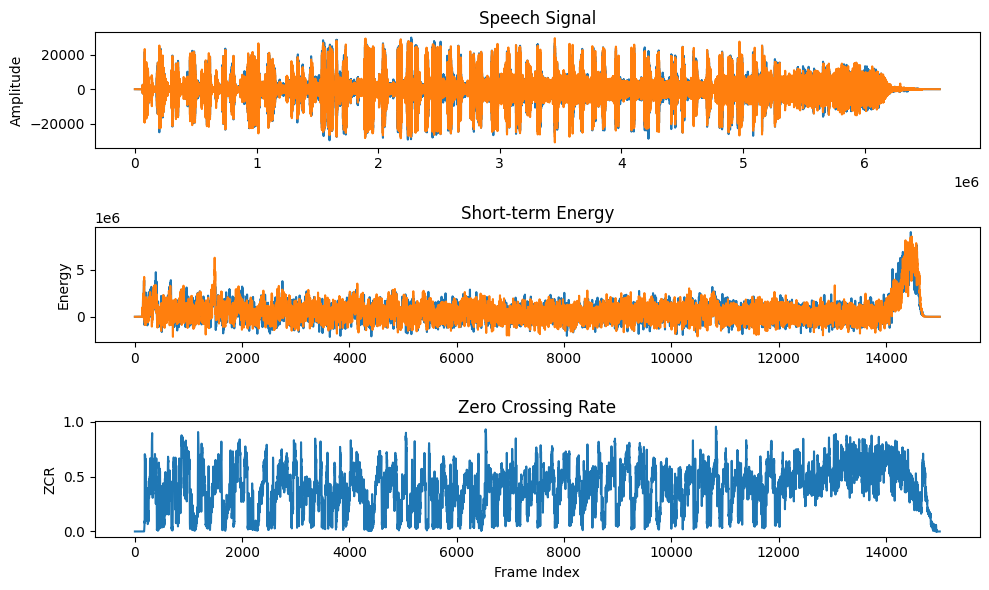

ValueError: window is longer than input signal

<Figure size 1000x600 with 0 Axes>

In [6]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.subplot(3, 1, 1)
plt.plot(signal)
plt.ylabel('Amplitude')
plt.title('Speech Signal')
plt.subplot(3, 1, 2)
plt.plot(energy)
plt.ylabel('Energy')
plt.title('Short-term Energy')
plt.subplot(3, 1, 3)
plt.plot(zc_rate)
plt.ylabel('ZCR')
plt.title('Zero Crossing Rate')
plt.xlabel('Frame Index')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.imshow(np.abs(stft(signal, nperseg=frame_length, noverlap=frame_step, window=hamming(frame_length), nfft=nfft)), aspect='auto', origin='lower', cmap='inferno')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('STFT')
plt.colorbar()
plt.show()

plt.figure(figsize=(10, 6))
plt.imshow(mfccs.T, aspect='auto', origin='lower', cmap='inferno')
plt.xlabel('Frame Index')
plt.ylabel('MFCC Coefficient Index')
plt.title('MFCCs')
plt.colorbar()
plt.show()